<a href="https://colab.research.google.com/github/RajTejani61/Intern/blob/main/Deep%20Learning/CNN/Tensorflow/Pneumonia_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Copy kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/

In [2]:
#!/bin/bash
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:20<00:00, 252MB/s]
100% 2.29G/2.29G [00:20<00:00, 120MB/s]


In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/chest-xray-pneumonia.zip')
zip_file.extractall('/content/chest-xray-pneumonia')
zip_file.close()

In [4]:
import tensorflow as ts

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_dir = '/content/chest-xray-pneumonia/chest_xray/train'
test_dir = '/content/chest-xray-pneumonia/chest_xray/test'
val_dir = '/content/chest-xray-pneumonia/chest_xray/val'

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./ 255,
    rotation_range = 20,
    horizontal_flip = True,
    zoom_range = 0.2
)

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'binary',
    shuffle = True
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'binary',
    shuffle = False
)
val_data = val_datagen.flow_from_directory(
    val_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(224, 224, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

In [11]:
model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[early_stop, reduce_lr])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 705ms/step - accuracy: 0.8311 - loss: 0.4352 - val_accuracy: 0.5000 - val_loss: 3.3710 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 687ms/step - accuracy: 0.9264 - loss: 0.2070 - val_accuracy: 0.5000 - val_loss: 3.0476 - learning_rate: 0.0010
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 687ms/step - accuracy: 0.9224 - loss: 0.2017 - val_accuracy: 0.5000 - val_loss: 4.9402 - learning_rate: 0.0010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 690ms/step - accuracy: 0.9376 - loss: 0.1722 - val_accuracy: 0.5000 - val_loss: 2.5195 - learning_rate: 0.0010
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 701ms/step - accuracy: 0.9445 - loss: 0.1518 - val_accuracy: 0.5000 - val_loss: 4.9044 - learning_rate: 0.0010
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 693ms/step - accuracy: 0.9439 - loss: 0.1483 - val_accuracy: 0.8750 - val_loss: 0.3530 - learning_rate: 0.0010
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 681ms/step - accura

In [12]:
    loss, acc = model.evaluate(test_data)
print(f'Test loss: {loss:.4f}, Test accuracy: {acc:.4f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.6788 - loss: 0.7811
Test loss: 0.4858, Test accuracy: 0.8045


In [16]:
loss, acc = model.evaluate(train_data)
print(f'Train loss: {loss:.4f}, Train accuracy: {acc:.4f}')

163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 694ms/step - accuracy: 0.8978 - loss: 0.3402
Train loss: 0.3564, Train accuracy: 0.8946


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step


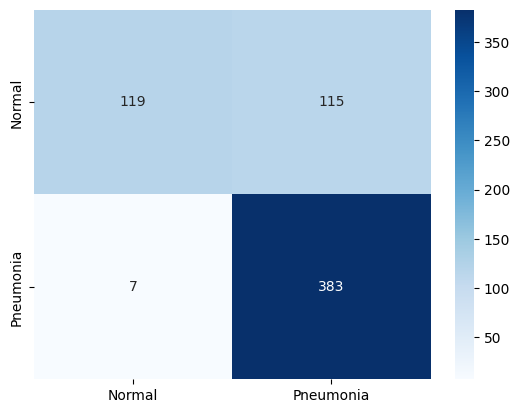

              precision    recall  f1-score   support

      Normal       0.94      0.51      0.66       234
   Pneumonia       0.77      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.86      0.75      0.76       624
weighted avg       0.83      0.80      0.79       624



In [14]:
y_pred = (model.predict(test_data) > 0.5).astype("int32")
cm = confusion_matrix(test_data.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Pneumonia"],
            yticklabels=["Normal", "Pneumonia"])
plt.show()

print(classification_report(test_data.classes, y_pred, target_names=["Normal", "Pneumonia"]))